In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns

# Load the dataset
data = px.data.gapminder().query("year == 2007")
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [3]:

# Round the gdpPercap values
data['gdpPercap'] = round(data['gdpPercap'], 0)

# Format the population values to millions
data['pop'] = round(data['pop'] / 1000000, 2)

# Round the lifeExp values
data['lifeExp'] = round(data['lifeExp'], 1)

# Create the scatter plot with labels
fig = px.scatter(data, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_name='country', log_x=True, size_max=60)
fig.update_layout(title='GDP per capita vs. Life expectancy in 2007', xaxis_title='GDP per capita (USD)', yaxis_title='Life expectancy (years)', legend_title='Continent')

# Show the plot
fig.show()

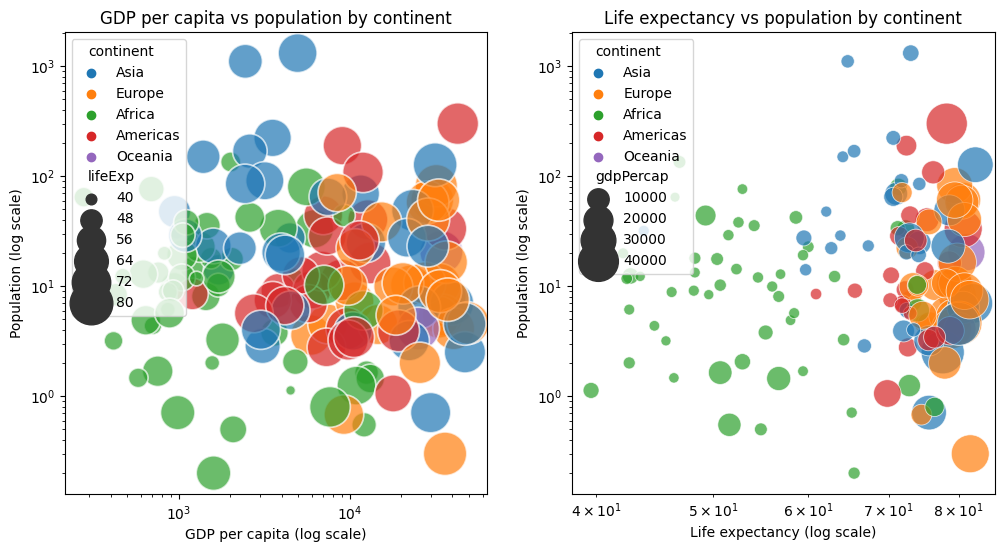

In [4]:


# Create the two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot 1: GDP per capita vs population
sns.scatterplot(data=data, x='gdpPercap', y='pop', hue='continent',
                size='lifeExp', sizes=(50, 1000), alpha=0.7, ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('GDP per capita (log scale)')
ax1.set_ylabel('Population (log scale)')
ax1.set_title('GDP per capita vs population by continent')

# Plot 2: Life expectancy vs population
sns.scatterplot(data=data, x='lifeExp', y='pop', hue='continent',
                size='gdpPercap', sizes=(50, 1000), alpha=0.7, ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Life expectancy (log scale)')
ax2.set_ylabel('Population (log scale)')
ax2.set_title('Life expectancy vs population by continent')

# Show the plot
plt.show()
